# Elements of AI : Unlocking Luxembourgish

Welcome to Unlocking Luxembourgish. In this session you'll work with a temporary public API (at **34.90.113.55:5000**) to experiment with our Luxembourgish AI models for Speech-to-Text (STT) and Text-to-Speech (TTS).

The notebook is divided into two parts:

**Part I: STT Exercises** – You'll test various STT parameters (such as VAD, disfluency detection, temperature, beam size, etc.), explore different ways of parsing the JSON output (e.g., subtitling), and see how to chunk longer audio files.

**Part II: TTS Exercises** – You'll send text to be synthesized, view the resulting WAV file directly in the notebook, preprocess input text, visualize the audio waveform, and apply audio modifications.

Each exercise includes a brief description and code. The goal of these exercises is to experiment and have fun, but more advanced users are welcome to try out their own code.

Happy experimenting!

*Before we begin, please run the following code. This will style the rest of the document such that it will be easier to read the code output.*

In [16]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## Part I: Speech-to-Text (STT) Exercises

In this section, you'll experiment with the STT endpoint by sending an audio file along with various parameters to see how they affect the transcription.

### Exercise STT-1: Test Health Endpoint

Verify that the API is accessible by checking the health endpoint. If you are experiencing issues or long delays, run this code to make sure the API is functioning. If the health check fails, please inform the instructor.

In [14]:
# exercise stt-1: test health endpoint
import requests

response = requests.get("http://34.90.113.55:5000/api/health")
print("status code:", response.status_code)
print("json response:", response.json())

# curl equivalent:
# curl http://34.90.113.55:5000/api/health

status code: 200
json response: {'status': 'healthy'}


### Exercise STT-2: Basic File Upload for STT Transcription

Send an audio file to the STT endpoint. This exercise uses the `transcribed` model with the language set to Luxembourgish (`lb`). If many users are using this model, you may change to the `timestamped` model instead, which is a second version of the same model.

In [17]:
# exercise stt-2: basic file upload for stt
audio_file_path = "EoAI_sample_1.wav"

with open(audio_file_path, "rb") as f:
    files = {"file": f}
    data = {
        "model_type": "transcribed",
        "model_params": '{"language": "lb"}'
    }
    response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    print("uploaded stt response status:", response.status_code)
    print("uploaded stt response json:", response.json())

# curl equivalent:
# curl -F "file=@EoAI_sample_1.wav" -F "model_type=transcribed" -F "model_params={\"language\":\"lb\"}" http://34.90.113.55:5000/api/stt/transcribe

uploaded stt response status: 200
uploaded stt response json: {'result': {'language': 'lb', 'segments': [{'avg_logprob': -0.04119794796674679, 'compression_ratio': 1.389937106918239, 'confidence': 0.957, 'end': 10.48, 'id': 0, 'no_speech_prob': 8.036618245887972e-12, 'seek': 0, 'start': 0.0, 'temperature': 0.0, 'text': "A wann eemol e puer Stonne keng nei Nouvellen iwwert de Crash oder de Lubitz selwer ze fanne waren, hunn d'Medien sech de Spigel selwer virun d'Gesicht gehalen an sech rezenséiert, kritiséiert, gelueft oder accuséiert.", 'tokens': [50364, 32, 38064, 308, 443, 401, 308, 2362, 260, 745, 22419, 350, 1501, 34517, 426, 8162, 19191, 741, 4979, 911, 368, 31787, 4513, 368, 43781, 6862, 5851, 1554, 5277, 3429, 716, 11931, 11, 7396, 77, 274, 6, 42954, 1053, 369, 339, 368, 1738, 328, 338, 5851, 1554, 4107, 409, 274, 6, 38, 279, 1405, 1519, 4947, 268, 364, 369, 339, 319, 16515, 526, 4859, 11, 42825, 22118, 4859, 11, 4087, 622, 844, 4513, 11168, 526, 4859, 13], 'words': [{'confidenc

### Exercise STT-3: Test VAD Parameter

Enable Voice Activity Detection (VAD) to remove non-speech segments. Here, we test it by setting `vad` to `true` (which by default uses Silero VAD).

In [18]:
import json
import requests

# set the vad setting: change to True or False as desired
vad_setting = True

# open the audio file in binary mode
audio_file_path = "EoAI_long.mp3"
with open(audio_file_path, "rb") as f:
    files = {"file": f}
    # build the model_params dictionary and convert it to a json string
    model_params = {"language": "lb", "vad": vad_setting}
    data = {
        "model_type": "transcribed",
        "model_params": json.dumps(model_params)
    }
    # send the file to the stt endpoint
    response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    print("vad", vad_setting, "response status:", response.status_code)
    response_json = response.json()
    print("vad", vad_setting, "response json:", response_json)

# if the response is successful and contains result data, compute and print statistics
if response.status_code == 200 and "result" in response_json:
    result = response_json["result"]
    segments = result.get("segments", [])
    num_segments = len(segments)
    # compute average confidence across segments (if available)
    confidences = [seg.get("confidence", 0) for seg in segments]
    avg_confidence = sum(confidences) / len(confidences) if confidences else 0
    # get the overall transcription text from the result
    transcription_text = result.get("text", "")

    print("\nstatistics:")
    print("number of segments:", num_segments)
    print("average confidence:", round(avg_confidence, 3))
    print("transcription text snippet:", transcription_text[:400], "...")
else:
    print("error: no valid result in response")


vad True response status: 200
vad True response json: {'result': {'language': 'lb', 'segments': [{'avg_logprob': -0.1575771967569987, 'compression_ratio': 1.4514767932489452, 'confidence': 0.931, 'end': 9.55, 'id': 0, 'no_speech_prob': 0.012669104151427746, 'seek': 0, 'start': 0.11, 'temperature': 0.0, 'text': 'Hien huet d’Prinzessin nees belieft a si bestuet, a laan a frou um Troun vum Wenzelwatt regéiert.', 'tokens': [50364, 39, 1053, 2137, 302, 274, 913, 247, 47, 12629, 37575, 259, 408, 279, 989, 414, 844, 257, 1511, 1151, 15382, 11, 257, 635, 282, 257, 431, 263, 1105, 1765, 1733, 371, 449, 343, 11368, 338, 86, 1591, 1121, 526, 4859, 13, 50864], 'words': [{'confidence': 0.998, 'end': 0.81, 'start': 0.11, 'text': 'Hien'}, {'confidence': 1.0, 'end': 1.27, 'start': 0.81, 'text': 'huet'}, {'confidence': 0.925, 'end': 2.29, 'start': 1.27, 'text': 'd’Prinzessin'}, {'confidence': 1.0, 'end': 2.61, 'start': 2.29, 'text': 'nees'}, {'confidence': 0.961, 'end': 3.39, 'start': 2.61, 'text': 'be

### Exercise STT-4: Test detect_disfluencies Parameter

Enable disfluency detection to mark hesitations or filler words in the transcription. This can help in applications where you want to highlight or remove disfluencies.

In [30]:
# exercise stt-4: test detect_disfluencies parameter
audio_file_path = "tts_output_eee.wav"
with open(audio_file_path, "rb") as f:
    files = {"file": f}
    data = {
        "model_type": "transcribed",
        "model_params": '{"language": "lb", "detect_disfluencies": true}'
    }
    response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    print("detect_disfluencies response status:", response.status_code)
    print("detect_disfluencies response json:", response.json())

detect_disfluencies response status: 200
detect_disfluencies response json: {'result': {'language': 'lb', 'segments': [{'avg_logprob': -0.06660731792449952, 'compression_ratio': 1.4294478527607362, 'confidence': 0.93, 'end': 16.26, 'id': 0, 'no_speech_prob': 2.446100234258092e-13, 'seek': 0, 'start': 0.0, 'temperature': 0.0, 'text': "Dat, ëëë, ëëë, nodeems se an engem Déischt, ëëë, ëëë, Spezialbericht zweedausendzweeanzwanzeg grouss Problemer an der Zouener, ëëë, d'Struktur, fir Jonker beschriwwent haten, ënner anerem en totaalt Vereelst Konzept.", 'tokens': [50364, 35, 267, 11, 690, 104, 15101, 15101, 11, 690, 104, 15101, 15101, 11, 9984, 9097, 369, 364, 465, 26322, 31153, 271, 4701, 11, 690, 104, 15101, 15101, 11, 690, 104, 15101, 15101, 11, 3550, 17787, 607, 1405, 8733, 292, 8463, 521, 89, 826, 68, 3910, 86, 3910, 1146, 677, 563, 82, 1705, 638, 936, 364, 1163, 1176, 263, 7971, 11, 690, 104, 15101, 15101, 11, 274, 6, 4520, 31543, 11, 12159, 7745, 5767, 17498, 470, 4979, 317, 2385, 26

### Exercise STT-5: Test trust_whisper_timestamps Parameter

Toggle the use of Whisper's timestamps. Here we test by setting `trust_whisper_timestamps` to `false`.

In [ ]:
# exercise stt-5: test trust_whisper_timestamps parameter set to false
audio_file_path = "maritim.m4a"
with open(audio_file_path, "rb") as f:
    files = {"file": f}
    data = {
        "model_type": "transcribed",
        "model_params": '{"language": "lb", "trust_whisper_timestamps": false}'
    }
    response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    print("trust_whisper_timestamps false response status:", response.status_code)
    print("trust_whisper_timestamps false response json:", response.json())

### Exercise STT-6: Test compute_word_confidence Parameter

Enable the computation of word confidence scores. This parameter allows you to see how confident the model is about each word in the transcription.

In [ ]:
# exercise stt-6: test compute_word_confidence parameter
audio_file_path = "maritim.m4a"
with open(audio_file_path, "rb") as f:
    files = {"file": f}
    data = {
        "model_type": "transcribed",
        "model_params": '{"language": "lb", "compute_word_confidence": true}'
    }
    response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    print("compute_word_confidence response status:", response.status_code)
    print("compute_word_confidence response json:", response.json())

### Exercise STT-7: Test refine_whisper_precision Parameter

Adjust the refinement of Whisper’s segment positions. Here we set `refine_whisper_precision` to `0.4` seconds.

In [ ]:
# exercise stt-7: test refine_whisper_precision parameter (set to 0.4)
audio_file_path = "maritim.m4a"
with open(audio_file_path, "rb") as f:
    files = {"file": f}
    data = {
        "model_type": "transcribed",
        "model_params": '{"language": "lb", "refine_whisper_precision": 0.4}'
    }
    response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    print("refine_whisper_precision response status:", response.status_code)
    print("refine_whisper_precision response json:", response.json())

### Exercise STT-8: Test Temperature Parameter

Experiment with the sampling temperature. Here we pass a list of fallback temperatures to see if it influences the transcription output.

In [ ]:
# exercise stt-8: test temperature parameter (using a list of fallback temperatures)
audio_file_path = "maritim.m4a"
with open(audio_file_path, "rb") as f:
    files = {"file": f}
    data = {
        "model_type": "transcribed",
        "model_params": '{"language": "lb", "temperature": [0.0, 0.2, 0.4]}'
    }
    response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    print("temperature parameter response status:", response.status_code)
    print("temperature parameter response json:", response.json())

temperature parameter response status: 200
temperature parameter response json: {'result': {'language': 'lb', 'segments': [{'avg_logprob': -0.18278425390070135, 'compression_ratio': 0.890625, 'confidence': 0.968, 'end': 3.8, 'id': 0, 'no_speech_prob': 7.518024560098507e-14, 'seek': 0, 'start': 0.0, 'temperature': 0.0, 'text': 'Dat maritimmt Klima hëlleft bei verschiddenen Allergien.', 'tokens': [50364, 35, 267, 1849, 270, 15314, 25136, 64, 276, 15101, 2447, 844, 4643, 20563, 6171, 268, 1057, 17025, 1053, 13, 51215], 'words': [{'confidence': 0.999, 'end': 0.32, 'start': 0.0, 'text': 'Dat'}, {'confidence': 0.839, 'end': 0.96, 'start': 0.32, 'text': 'maritimmt'}, {'confidence': 0.995, 'end': 1.68, 'start': 0.96, 'text': 'Klima'}, {'confidence': 1.0, 'end': 2.08, 'start': 1.68, 'text': 'hëlleft'}, {'confidence': 1.0, 'end': 2.24, 'start': 2.08, 'text': 'bei'}, {'confidence': 0.998, 'end': 2.98, 'start': 2.24, 'text': 'verschiddenen'}, {'confidence': 0.983, 'end': 3.8, 'start': 2.98, 'text'

### Exercise STT-9: Test Beam Size and Best Of Parameters

Adjust beam search parameters (`beam_size` and `best_of`) to see how they affect transcription quality and speed.

In [ ]:
# exercise stt-9: test beam_size and best_of parameters
audio_file_path = "EoAI_sample_6.wav"
with open(audio_file_path, "rb") as f:
    files = {"file": f}
    data = {
        "model_type": "transcribed",
        "model_params": '{"language": "lb", "beam_size": 5, "best_of": 3}'
    }
    response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    print("beam_size and best_of response status:", response.status_code)
    print("beam_size and best_of response json:", response.json())

beam_size and best_of response status: 200
beam_size and best_of response json: {'result': {'language': 'lb', 'segments': [{'avg_logprob': -0.032199617475271225, 'compression_ratio': 1.25, 'confidence': 0.97, 'end': 10.56, 'id': 0, 'no_speech_prob': 1.783052283599318e-08, 'seek': 0, 'start': 0.0, 'temperature': 0.0, 'text': "Sécher, d'Chamber hat de Lead an der Campagne et sollt kee parteipolitesche Walkampf ginn, mä warscheinlech war et e Feeler, sech als Parteien awer och als Regierung net méi anzemëschen.", 'tokens': [50364, 50, 526, 6759, 11, 274, 6, 34, 4822, 607, 2385, 368, 31025, 364, 1163, 9189, 13887, 1030, 7114, 83, 803, 68, 6975, 647, 401, 3324, 1876, 10818, 30157, 290, 7729, 11, 25117, 13718, 1876, 259, 306, 339, 1516, 1030, 308, 3697, 6185, 11, 369, 339, 3907, 47689, 1053, 257, 1554, 3795, 3907, 42979, 2533, 13191, 72, 364, 24313, 15101, 82, 2470, 13], 'words': [{'confidence': 0.998, 'end': 0.74, 'start': 0.0, 'text': 'Sécher,'}, {'confidence': 0.999, 'end': 1.22, 'start':

### Exercise STT-10: Convert STT JSON Output to SRT Format

Write a function to convert the raw JSON output from the STT endpoint into SRT format. This can be useful for creating subtitles.

In [ ]:
import math

def sec_to_time(seconds):
    # convert seconds to srt time format: hh:mm:ss,ms
    hours = math.floor(seconds / 3600)
    minutes = math.floor((seconds % 3600) / 60)
    secs = seconds % 60
    millis = int((secs - int(secs)) * 1000)
    return f"{hours:02}:{minutes:02}:{int(secs):02},{millis:03}"

def json_to_srt(result_json):
    # get the list of transcription segments from the json
    segments = result_json.get("result", {}).get("segments", [])
    srt_output = ""
    srt_counter = 1  # subtitle numbering starts at 1
    max_chunk_duration = 5.0  # maximum duration per subtitle in seconds

    for seg in segments:
        # retrieve segment start and end times and the overall segment text
        seg_start = seg.get("start", 0)
        seg_end = seg.get("end", 0)
        seg_text = seg.get("text", "").strip()
        duration = seg_end - seg_start

        # if the segment is short (<= max duration) or no word-level info is available,
        # output the segment as a single subtitle
        if duration <= max_chunk_duration or "words" not in seg:
            srt_output += f"{srt_counter}\n{sec_to_time(seg_start)} --> {sec_to_time(seg_end)}\n{seg_text}\n\n"
            srt_counter += 1
        else:
            # if the segment is long and word-level timestamps exist, we split it without cutting words
            words = seg.get("words", [])
            if not words:
                # fallback if words list is empty
                srt_output += f"{srt_counter}\n{sec_to_time(seg_start)} --> {sec_to_time(seg_end)}\n{seg_text}\n\n"
                srt_counter += 1
                continue

            # start the first subtitle chunk at the segment's start time
            current_chunk_start = seg_start
            current_chunk_words = []  # list to collect words for the current subtitle

            for word in words:
                # get the text of the word (using the 'text' key, as provided in your json)
                word_text = word.get("text", "")
                # get the start time of the word; if missing, default to current chunk start
                word_start = word.get("start", current_chunk_start)

                # if adding this word would exceed our maximum subtitle duration,
                # finish the current subtitle chunk before this word starts
                if (word_start - current_chunk_start) > max_chunk_duration:
                    # join the collected words into a string for the current subtitle chunk
                    chunk_text = " ".join(current_chunk_words)
                    # set the current chunk's end time to the start time of this word
                    current_chunk_end = word_start
                    srt_output += f"{srt_counter}\n{sec_to_time(current_chunk_start)} --> {sec_to_time(current_chunk_end)}\n{chunk_text}\n\n"
                    srt_counter += 1
                    # start a new chunk beginning with the current word
                    current_chunk_start = word_start
                    current_chunk_words = [word_text]
                else:
                    # if within the allowed duration, add the word to the current chunk
                    current_chunk_words.append(word_text)
            # output any remaining words as the final subtitle chunk for this segment
            if current_chunk_words:
                srt_output += f"{srt_counter}\n{sec_to_time(current_chunk_start)} --> {sec_to_time(seg_end)}\n{' '.join(current_chunk_words)}\n\n"
                srt_counter += 1

    return srt_output

# demo using the latest stt response json from your stt endpoint
# note: replace 'response.json()' with your actual stt json response if needed
result_json = response.json()  # using the latest stt response
srt_text = json_to_srt(result_json)
print("srt output:\n", srt_text)


srt output:
 1
00:00:00,000 --> 00:00:05,280
Sécher, d'Chamber hat de Lead an der Campagne et sollt kee parteipolitesche Walkampf ginn,

2
00:00:05,280 --> 00:00:10,560
mä warscheinlech war et e Feeler, sech als Parteien awer och als Regierung net méi anzemëschen.




### Exercise STT-11: Chunking Long Audio Files

Demonstrate how to split a long audio file into smaller chunks so as not to overwhelm the GPU. (This is a simplified example using `pydub`.)

In [ ]:
# install pydub if needed
!pip install pydub

import math
from pydub import AudioSegment
from io import BytesIO
import requests

def chunk_audio_in_memory(file_path, chunk_duration):
    """
    read an audio file and split it into chunks of chunk_duration seconds.
    returns a list of tuples: (audio_chunk, chunk_start_time_in_seconds).
    """
    # load the entire audio file into memory
    audio = AudioSegment.from_file(file_path)
    duration_ms = len(audio)  # duration in milliseconds
    chunks = []
    # iterate through the audio in increments of chunk_duration (converted to ms)
    for start in range(0, duration_ms, int(chunk_duration * 1000)):
        end = min(start + int(chunk_duration * 1000), duration_ms)
        chunk = audio[start:end]
        # append the chunk along with its start time (in seconds)
        chunks.append((chunk, start / 1000.0))
    return chunks

def process_chunk(chunk, chunk_start, model_type="transcribed", model_params='{"language": "lb"}'):
    """
    export an audio chunk to a temporary in-memory wav file,
    send it to the stt endpoint, and adjust the timestamps of the returned segments.
    """
    # create a bytes buffer to hold the wav file data
    chunk_io = BytesIO()
    # export the chunk in wav format into the bytes buffer
    chunk.export(chunk_io, format="wav")
    # reset pointer to the beginning of the buffer
    chunk_io.seek(0)

    # prepare the file data for multipart/form-data
    files = {"file": ("chunk.wav", chunk_io, "audio/wav")}
    data = {
        "model_type": model_type,
        "model_params": model_params
    }
    # send the chunk to the stt endpoint (adjust the url if needed)
    response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    result_json = response.json()

    # adjust the timing in each segment by adding the chunk's start time
    segments = result_json.get("result", {}).get("segments", [])
    for seg in segments:
        seg["start"] += chunk_start
        seg["end"] += chunk_start
        # adjust word-level timestamps if available
        if "words" in seg:
            for word in seg["words"]:
                word["start"] += chunk_start
                word["end"] += chunk_start
    return result_json

# main process: chunk the file, process each chunk, and combine the results
file_path = "maritim.m4a"  # update with your audio file path
chunk_duration = 15  # seconds per chunk

# get list of (chunk, start_time) tuples
chunks = chunk_audio_in_memory(file_path, chunk_duration)
print("number of chunks:", len(chunks))

all_segments = []  # list to hold all transcription segments

# process each chunk one by one
for chunk, start_time in chunks:
    print("processing chunk starting at", start_time, "seconds")
    result_json = process_chunk(chunk, start_time)
    segments = result_json.get("result", {}).get("segments", [])
    all_segments.extend(segments)

# combine all segments into one final result
final_text = " ".join(seg.get("text", "") for seg in all_segments)
final_result = {
    "result": {
        "segments": all_segments,
        "text": final_text
    },
    "status": "success"
}

print("final combined transcription:")
print(final_result["result"]["text"])


number of chunks: 1
processing chunk starting at 0.0 seconds
final combined transcription:
Dat maritimmt Klima hëlleft bei verschiddenen Allergien.


### Exercise STT-12: Advanced JSON Parsing – Extract Word-level Timestamps

Extract word-level timestamps from the STT JSON output and display them in a table using Pandas.

In [ ]:
# exercise stt-12: extract word-level timestamps and display in a table
import pandas as pd

def extract_word_timestamps(result_json):
    # assume each segment has a 'words' key with a list of dicts with 'word', 'start', 'end'
    segments = result_json.get("result", {}).get("segments", [])
    rows = []
    for seg in segments:
        words = seg.get("words", [])
        for w in words:
            rows.append({
                "word": w.get("word", ""),
                "start": w.get("start", 0),
                "end": w.get("end", 0)
            })
    return pd.DataFrame(rows)

# demo extraction using latest stt response
df = extract_word_timestamps(result_json)
print(df.head())

  word  start   end
0        0.00  0.32
1        0.32  0.94
2        0.94  1.64
3        1.64  1.96
4        1.96  2.24


### Exercise STT-13: Evaluate Transcription Quality with Different Parameters

Compare transcriptions obtained with default parameters versus with disfluency detection enabled.

In [ ]:
# exercise stt-13: compare transcription outputs with different parameters
def get_transcription(model_params_str):
    with open("maritim.m4a", "rb") as f:
        files = {"file": f}
        data = {
            "model_type": "transcribed",
            "model_params": model_params_str
        }
        response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
        return response.json()

# transcription with default parameters
default_result = get_transcription('{"language": "lb"}')
# transcription with detect_disfluencies enabled
disfluencies_result = get_transcription('{"language": "lb", "detect_disfluencies": true}')

print("default transcription:\n", default_result)
print("disfluencies transcription:\n", disfluencies_result)

## Part II: Text-to-Speech (TTS) Exercises

In this section, you'll experiment with the TTS endpoint. You will send text to synthesize audio, display the resulting WAV file directly in the notebook, preprocess text, visualize waveforms, and apply some audio modifications.

### Exercise TTS-1: Basic TTS Request

Send a simple text to the TTS endpoint and save the resulting WAV file. Then, display the audio directly in the notebook.

In [ ]:
# exercise tts-1: basic tts request
tts_payload = {"text": "Gudde Moien, hei ass e Beispill vum Text-to-Speech an der lëtzebuergescher Sprooch."}
response = requests.post("http://34.90.113.55:5000/api/tts/synthesize", json=tts_payload, timeout=120)
print("tts response status:", response.status_code)

with open("tts_output.wav", "wb") as f:
    f.write(response.content)
print("saved tts_output.wav locally")

tts response status: 200
saved tts_output.wav locally


In [ ]:
# exercise tts-1: display the tts output audio
from IPython.display import Audio
Audio("tts_output.wav")

### Exercise TTS-2: Preprocess Text for TTS

Preprocess the input text (e.g., convert to lowercase and trim extra whitespace) before sending it to the TTS endpoint.

In [ ]:
# exercise tts-2: preprocess text before tts
raw_text = "Hello, THIS is A TTS Test!  "
processed_text = raw_text.lower().strip()
print("processed text:", processed_text)

tts_payload = {"text": processed_text}
response = requests.post("http://34.90.113.55:5000/api/tts/synthesize", json=tts_payload, timeout=120)

with open("tts_processed.wav", "wb") as f:
    f.write(response.content)
print("saved tts_processed.wav locally")

processed text: hello, this is a tts test!
saved tts_processed.wav locally


In [ ]:
# exercise tts-2: display processed tts audio
Audio("tts_processed.wav")

### Exercise TTS-3: Visualize TTS Waveform

Load the synthesized audio and plot its waveform using matplotlib.

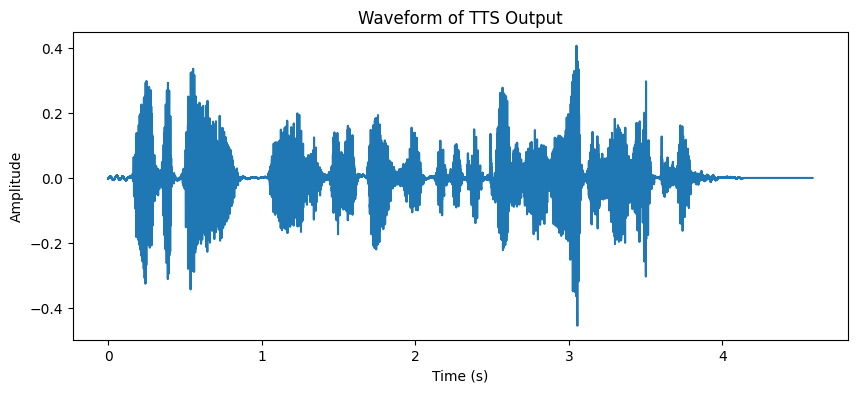

In [ ]:
# exercise tts-3: visualize the waveform of tts output
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

data, samplerate = sf.read("tts_output.wav")
times = np.linspace(0, len(data)/samplerate, num=len(data))

plt.figure(figsize=(10,4))
plt.plot(times, data)
plt.title("Waveform of TTS Output")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### Exercise TTS-4: Modify TTS Output with an Audio Filter

Use `pydub` to apply an audio filter to the TTS output—for example, increasing the playback speed.

In [ ]:
# exercise tts-4: modify tts output - change speed using pydub
from pydub import AudioSegment

tts_audio = AudioSegment.from_wav("tts_output.wav")
# increase speed by 1.5x
faster_audio = tts_audio.speedup(playback_speed=1.5)
faster_audio.export("tts_faster.wav", format="wav")
print("exported tts_faster.wav")

exported tts_faster.wav


In [ ]:
# exercise tts-4: display modified tts audio
Audio("tts_faster.wav")

### Exercise TTS-5: Chain STT and TTS

Transcribe an audio file using the STT endpoint and then synthesize the resulting text using the TTS endpoint. This demonstrates a full processing pipeline.

In [ ]:
import requests
from pydub import AudioSegment

# exercise tts-5: chain stt and tts
with open("maritim.m4a", "rb") as f:
    files = {"file": f}
    data = {
        "model_type": "transcribed",
        "model_params": '{"language": "lb"}'
    }
    stt_response = requests.post("http://34.90.113.55:5000/api/stt/transcribe", files=files, data=data, timeout=600)
    stt_result = stt_response.json()
    transcription_text = stt_result.get("result", {}).get("text", "")
    print("transcription:", transcription_text)

tts_payload = {"text": transcription_text}
tts_response = requests.post("http://34.90.113.55:5000/api/tts/synthesize", json=tts_payload, timeout=120)
with open("chain_tts.wav", "wb") as f:
    f.write(tts_response.content)
print("saved chain_tts.wav locally")

transcription: Dat maritimmt Klima hëlleft bei verschiddenen Allergien.
saved chain_tts.wav locally


In [ ]:
# exercise tts-5: display chained tts audio
from IPython.display import Audio

Audio("chain_tts.wav")

### Exercise TTS-6: Free Experimentation for TTS

Feel free to experiment with different input texts and modifications to the TTS output. Document your observations as you adjust parameters or post-process the audio.

In [ ]:
# exercise tts-6: free experimentation placeholder for tts
print("experiment with tts parameters and audio modifications as desired")

### Exercise TTS-7: Advanced TTS Modification – Adjust Volume

Use `pydub` to modify the volume of the synthesized audio (e.g. increase by 6 dB) and then play the modified output.

In [ ]:
# exercise tts-7: advanced tts modification - adjust volume using pydub

tts_audio = AudioSegment.from_wav("tts_output.wav")
# increase volume by 6 dB
louder_audio = tts_audio + 6
louder_audio.export("tts_louder.wav", format="wav")
print("exported tts_louder.wav with increased volume")

exported tts_louder.wav with increased volume


In [ ]:
# exercise tts-7: display advanced tts modified audio
from IPython.display import Audio

Audio("tts_louder.wav")

# Utilities

In [10]:
import glob
from IPython.display import display, HTML, Audio

# get a list of audio files with wav and mp3 extensions
wav_files = glob.glob("*.wav")
mp3_files = glob.glob("*.mp3")
audio_files = wav_files + mp3_files

rows = []  # list to hold (audio display html, transcription text) tuples

for audio_file in audio_files:
    # get the base filename (without extension)
    base = audio_file.rsplit(".", 1)[0]
    txt_file = base + ".txt"  # expected corresponding transcription file
    try:
        with open(txt_file, "r") as f:
            transcription = f.read().strip()
    except FileNotFoundError:
        transcription = "no transcription found"

    # create an embedded audio player using IPython.display.Audio
    audio_display = Audio(audio_file, embed=True)._repr_html_()
    rows.append((audio_display, transcription))

# build an html table to display the audio players and corresponding transcriptions
table_html = "<table border='1' style='border-collapse: collapse; width: 100%;'>"
table_html += "<tr><th>audio</th><th>reference transcription</th></tr>"
for audio_disp, trans in rows:
    table_html += f"<tr><td>{audio_disp}</td><td>{trans}</td></tr>"
table_html += "</table>"

display(HTML(table_html))

In [9]:
def word_error_rate(reference, hypothesis):
    # split both strings into lists of words (converted to lowercase to normalize)
    ref_words = reference.lower().split()
    hyp_words = hypothesis.lower().split()

    # create a dp table of size (len(ref_words)+1) x (len(hyp_words)+1)
    dp = [[0] * (len(hyp_words) + 1) for _ in range(len(ref_words) + 1)]

    # initialize base cases: distance from empty string
    for i in range(len(ref_words) + 1):
        dp[i][0] = i  # i deletions
    for j in range(len(hyp_words) + 1):
        dp[0][j] = j  # j insertions

    # fill the dp table using dynamic programming
    for i in range(1, len(ref_words) + 1):
        for j in range(1, len(hyp_words) + 1):
            if ref_words[i - 1] == hyp_words[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # no error if words are the same
            else:
                substitution = dp[i - 1][j - 1] + 1
                insertion = dp[i][j - 1] + 1
                deletion = dp[i - 1][j] + 1
                dp[i][j] = min(substitution, insertion, deletion)

    edit_distance = dp[len(ref_words)][len(hyp_words)]
    # calculate wer as edit distance divided by number of words in the reference
    wer = edit_distance / float(len(ref_words)) if ref_words else 0
    return wer

# read the reference transcription from a text file
ref_filename = "EoAI_long.txt"  # update with the desired filename
with open(ref_filename, "r") as f:
    reference_transcription = f.read().strip()

# assume the model's transcription is obtained from the stt endpoint
# for example, using response.json() from an earlier request:
model_transcription = response.json().get("result", {}).get("text", "")

print("reference transcription:")
print(reference_transcription)
print("\nmodel transcription:")
print(model_transcription)

# compute the word error rate between the reference and model transcriptions
wer = word_error_rate(reference_transcription, model_transcription)
print("\nword error rate (wer):", round(wer, 3))

reference transcription:
Hien huet d'Prinzessin nees belieft a si bestuet, a laang a frou um Troun vum Wenzelwatt regéiert. Säi ganzt Gefuddels koum och ni eraus. Dorunner ass nun däitlech ze gesinn, kee Märchen hu mir hei verzielt, mee dat, wat wierklech wor geschitt, well sou ee Märche geet dach ëmmer aus, datt dee gewënnt, dee léif a gutt. D’Geschicht Wéi den Erg Eegendriff de Blatzert iwwerwënnt aus dem Buch Robotermärchen vum Stanislaw Lem. Iwwersetzung op Lëtzebuergesch Guy Berg.

model transcription:
Hien huet d’Prinzessin nees belieft a si bestuet, a laan a frou um Troun vum Wenzelwatt regéiert. Säi ganzt Gefuddels koum och ni eraus. Dorunner ass nun däitlech ze gesinn, kee Märchen hu mir hei verzielt, mee dat, wat wierklech wor, geschitt, well sou ee Märchen geet dach ëmmer aus, datt d’Prinzessin sech net weess, wat se wëllt.Dee gewënnt, dee léif a gutt. Geschicht, wéi den Ark Eegendrëff de Blatzert iwwerwënnt, aus dem Buch Robottermäerchen vum Stanislav Lemm. Iwwersëtzung op 

## Conclusion and Next Steps

In this notebook you:

- Experimented with a range of STT parameters to see how they influence transcription output.
- Learned how to parse and convert raw JSON outputs (e.g., to SRT format) and even how to chunk long audio files.
- Explored the TTS endpoint by synthesizing speech from text, visualizing waveforms, and applying post-processing filters.

Feel free to extend these exercises with your own experiments and modifications. Happy coding!